In [2]:
import numpy as np
from numpy import random as rd
import time
from solvers_listos import *
from funciones import *

In [3]:
# # objective function
# def objective(v):
# 	x, y = v
# 	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# # check if a point is within the bounds of the search
# def in_bounds(point, bounds):
# 	# enumerate all dimensions of the point
# 	for d in range(len(bounds)):
# 		# check if out of bounds for this dimension
# 		if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
# 			return False
# 	return True

# # hill climbing local search algorithm
# def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
# 	# store the initial point
# 	solution = start_pt
# 	# evaluate the initial point
# 	solution_eval = objective(solution)
# 	# run the hill climb
# 	for i in range(n_iterations):
# 		# take a step
# 		candidate = None
# 		while candidate is None or not in_bounds(candidate, bounds):
# 			candidate = solution + randn(len(bounds)) * step_size
# 		# evaluate candidate point
# 		candidte_eval = objective(candidate)
# 		# check if we should keep the new point
# 		if candidte_eval <= solution_eval:
# 			# store the new point
# 			solution, solution_eval = candidate, candidte_eval
# 	return [solution, solution_eval]

# # iterated local search algorithm
# def iterated_local_search(objective, bounds, n_iter, step_size, n_restarts, p_size):
# 	# define starting point
# 	best = None
# 	while best is None or not in_bounds(best, bounds):
# 		best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# 	# evaluate current best point
# 	best_eval = objective(best)
# 	# enumerate restarts
# 	for n in range(n_restarts):
# 		# generate an initial point as a perturbed version of the last best
# 		start_pt = None
# 		while start_pt is None or not in_bounds(start_pt, bounds):
# 			start_pt = best + randn(len(bounds)) * p_size
# 		# perform a stochastic hill climbing search
# 		solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
# 		# check for new best
# 		if solution_eval < best_eval:
# 			best, best_eval = solution, solution_eval
# 			print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
# 	return [best, best_eval]

# # seed the pseudorandom number generator
# seed(1)
# # define range for input
# bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# # define the total iterations
# n_iter = 1000
# # define the maximum step size
# s_size = 0.05
# # total number of random restarts
# n_restarts = 30
# # perturbation step size
# p_size = 1.0
# # perform the hill climbing search
# best, score = iterated_local_search(objective, bounds, n_iter, s_size, n_restarts, p_size)
# print('Done!')
# print('f(%s) = %f' % (best, score))


In [4]:
# def random_removal(state, random_state):
#     destroyed = state.copy()

#     for node in random_state.choice(
#         range(1, len(G.nodes)), nodes_to_destroy, replace=False
#     ):
#         node = f"N_{node}"
#         if node == "N_0":
#             print("No se puede eliminar el depósito")
#         destroyed.unnasigned.append(node)
#         route = destroyed.find_route(node)
#         if route is not None:
#             route.remove(node)
    
#     non_empty_routes = [ruta for ruta in destroyed.routes if len(ruta) > 0]

#     destroyed.routes = non_empty_routes
#     return destroyed

# def greedy_repair(state, random_state):
#     repaired = state.copy()

#     random_state.shuffle(repaired.unnasigned)

#     while len(repaired.unnasigned) > 0:
#         node = repaired.unnasigned.pop()
#         route, idx = best_insert(node, repaired)
#         if route is not None:
#             route.insert(idx, node)
#         else:
#             repaired.routes.append([node])
#     return repaired

# def best_insert(node, state):
#     best_cost, best_route, best_idx = float("inf"), None, None
#     for route in state.routes:
#         for i in range(1, len(route) + 1):
#             if can_insert(node, route):
#                 cost = insertion_cost(node, route, i)

#                 if cost < best_cost:
#                     best_cost = cost
#                     best_route = route
#                     best_idx = i

#     return best_route, best_idx

# def can_insert(node, route, demanda, cap = 871):
#     total = sum([demanda[int(nodo[2:])] for nodo in route])
#     return total + demanda[int(node[2:])] <= cap   ####OJO ACÁ CON EL CAP, SI QUIERO CAMBIAR LA CAPACIDAD DEL VEHÍCULO TENGO QUE MODIFICARLO ACÁ

# def insertion_cost(node, route, idx):
#     pred = "N_0" if idx == 0 else route[idx - 1]
#     succ = "N_0" if idx == len(route) else route[idx]
#     dist = distancias[pred][node] + distancias[node][succ] - distancias[pred][succ]
#     return dist

# def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
# 	# store the initial point
# 	solution = start_pt
# 	# evaluate the initial point
# 	solution_eval = objective(solution)
# 	# run the hill climb
# 	for i in range(n_iterations):
# 		# take a step
# 		candidate = None
# 		while candidate is None or not in_bounds(candidate, bounds):
# 			candidate = solution + randn(len(bounds)) * step_size
# 		# evaluate candidate point
# 		candidte_eval = objective(candidate)
# 		# check if we should keep the new point
# 		if candidte_eval <= solution_eval:
# 			# store the new point
# 			solution, solution_eval = candidate, candidte_eval
# 	return [solution, solution_eval]

In [5]:
def eliminar_duplicados(ruta):
    if type(ruta) != list:
        print(f'La ruta {ruta} no es una lista' )
        return []
    else:
        unique_nodes = []
        [unique_nodes.append(node) for node in ruta if node not in unique_nodes]
        return unique_nodes

def random_reverse(rutas, nodos = [] ,iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if len(ruta) > 2:
            i, j = rd.choice(range(1, len(ruta)), 2, replace=False)
            ruta[i], ruta[j] = ruta[j], ruta[i]
            # print(f'{id}: {ruta}')
        rutas[id] = eliminar_duplicados(ruta)
    return rutas

def random_swap(rutas, nodos = [], iters=1):
    for _ in range(iters):
        id1,id2 = rd.choice(len(rutas), 2, replace = False)
        ruta1, ruta2 = rutas[id1], rutas[id2]
        # print(f'{id1}: {ruta1} | {id2}: {ruta2}')
        if len(ruta1) > 3 and len(ruta2)>3:
            bloque1 = rd.choice(range(1, len(ruta1)-1))  
            par1 = (ruta1[bloque1], ruta1[bloque1 + 1])
            bloque2 = rd.choice(range(1, len(ruta2)-1))
            par2 = (ruta2[bloque2], ruta2[bloque2 + 1])
            # print(f'R{id1}-Bloque1: {par1} x R{id2}-Bloque2: {par2}')
            ruta1[bloque1], ruta1[bloque1+1] = par2[0], par2[1] 
            ruta2[bloque2], ruta2[bloque2+1] = par1[0], par1[1]
            ruta1, ruta2 = eliminar_duplicados(ruta1), eliminar_duplicados(ruta2)
        rutas[id1] = ruta1
        rutas[id2] = ruta2
    return rutas

def random_move(rutas, nodos = [], iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if len(ruta) > 3:
            i, j = rd.choice(range(1, len(ruta)), 2, replace=False)
            node = ruta.pop(i)
            # print(f'Muevo el nodo {node} de la ruta {id} de la posición {i} a la posición {j}')
            ruta.insert(j, node)
        rutas[id] = eliminar_duplicados(ruta)
    return rutas

def random_insert(rutas, nodos, iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        nodo = rd.choice(nodos)
        if ruta != [] and len(ruta)>2:
            pos = rd.choice(range(1, len(ruta)))
            # print(f'Inserto el nodo {nodo} en la ruta {id} en la posición {pos}')
            ruta.insert(pos, nodo)
            ruta = eliminar_duplicados(ruta)
            rutas[id] = ruta
    return rutas

def random_remove(rutas, nodos = [], iters = 1):
    for _ in range(iters):
        id = rd.choice(len(rutas))
        ruta = rutas[id]
        if ruta != [] and len(ruta) > 1:
            pos = rd.choice(range(1, len(ruta)))
            # print(f'Elimino el nodo {ruta[pos]} de la ruta {id} en la posición {pos}')
            ruta.pop(pos)
            rutas[id] = eliminar_duplicados(ruta)
    return rutas

def operacion_random(rutas, nodos):
    ops = [random_insert, random_remove, random_move, random_swap, random_reverse]
    op = rd.choice(ops)
    # print(f'Operación: {op.__name__}')
    resultado = op(rutas, nodos)
    if type(resultado)==list:
        r = [eliminar_duplicados(ruta) for ruta in resultado]
    elif type(resultado)==dict: 
        r = [eliminar_duplicados(ruta) for ruta in resultado.values()]

    return r

# nodos = [1,2,3,4,5,6,7,8,9,10]
# rutas = [[], [0,2,6,1,7,5], [0,4,1,7,5,3,9], [0,1,6,9,3,10,5]]
# operacion_random(rutas, nodos)


In [6]:
def realizacion_demanda_LS(G, demandas, ruido = 0.05):
    """
    Función que simula la demanda de los locales para un determinado periodo.
    """
    grafo = G.copy()
    insatisfecho = 0
    for nodo in grafo.nodes(data=True):
        if nodo[0] != 'N_0':
            dem = demandas[int(nodo[0][2:])]
            if dem <= grafo.nodes[nodo[0]]['Inv']:
                grafo.nodes[nodo[0]]['Inv'] -= dem

            else:
                grafo.nodes[nodo[0]]['Inv'] = 0
                insatisfecho += dem - grafo.nodes[nodo[0]]['Inv']
    # print(dems)
    # for nodo in grafo.nodes(data=True):
        # print(nodo[0],nodo[1]['Inv'])

    return grafo, insatisfecho

def adaptar_pron(prono, F):
    dict_pro = {}
    for t in range(F):
        dict_pro[t] = {nodo: prono[nodo]  for nodo in prono.keys()}
    return dict_pro

def reaccion_inventario_LS(graf, mu, sd, alfa = 0.025):
    """
    Función que verifica que locales deben ser visitados en base a su inventario actual. 
    En caso de que el inventario se encuentre bajo el umbral de tolerancia, se retorna True.
    """
    grafo = graf.copy()
    visitas = {nodo : False for nodo in G.nodes()}
    for nodo in grafo.nodes(data=True):
        id_nodo = int(nodo[0][2:])-1
        media = mu[id_nodo]
        desviacion = sd[id_nodo]
        s = media + norm.ppf((1 - alfa)/2)* desviacion  #Stock de seguridad
        # print(f'{nodo[1]["Inv"]}, s{int(nodo[0][2:])} = {s}, {nodo[1]["Inv"] <= s}')
        if nodo[1]["Inv"] <= s:
            visitas[nodo[0]] = True
            # print(f'Visitar {nodo[0]}')
    # print(visitas)
    return visitas

def ejecutar_ruta(G,ruta,matriz_dst):
    """
    Función que simula la ejecución de una ruta.
    """
    g = G.copy()
    ruta = ruta.copy()
    ruta.pop(0)
    ruta.pop(-1)
    ruta = [int(nodo[2:]) for nodo in ruta]
    # distancia = calcular_largo_ruta(ruta, matriz_dst)
    stock = 0
    for nodo in ruta:
        stock += g.nodes[f'N_{nodo}']['Up'] - G.nodes[f'N_{nodo}']['Inv']
        g.nodes[f'N_{nodo}']['Inv'] = G.nodes[f'N_{nodo}']['Up']
    g.nodes['N_0']['Inv'] -= stock
    return g, stock



In [7]:
def costo_total(rutas, distancias, G, demandas):
    grafo = G.copy()
    costo_distancia = 0
    costo_SO = 0
    if type(rutas) == dict:
        for ruta in rutas.values():
            if ruta != [] and ruta != ['N_0'] and len(ruta) > 2:
                for i in range(len(ruta) - 1):
                    d = distancias[ruta[i]][ruta[i + 1]]
                    if d == np.inf:
                        print(f'{ruta} | {ruta[i]}, {ruta[i + 1]}: {d}')
                    costo_distancia += d
                # print(ruta)
                grafo, _ = ejecutar_ruta(grafo, ruta, distancias)
            else:
                costo_distancia += 0
            
            _, insatisfecho = realizacion_demanda_LS(grafo, demandas)
            costo_SO += insatisfecho*1000
            # print(ruta, costo_distancia, costo_SO)
    
    if type(rutas) == list:
        for ruta in rutas:
            if ruta != [] and ruta != ['N_0'] and len(ruta) > 2:
                for i in range(len(ruta) - 1):
                    d = distancias[ruta[i]][ruta[i + 1]]
                    if d == np.inf:
                        print(f'{ruta} | {ruta[i]}, {ruta[i + 1]}: {d}')
                    costo_distancia += d
                # print(ruta)
                grafo, _ = ejecutar_ruta(grafo, ruta, distancias)
            else:
                costo_distancia += 0
            
            _, insatisfecho = realizacion_demanda_LS(grafo, demandas)
            costo_SO += insatisfecho*1000
            # print(ruta, costo_distancia, costo_SO)
    return costo_SO + costo_distancia

In [8]:
def Local_Search(G, ruta_0, demandas, distancias, cap, F, n_restarts = 50, n_iters = 10):
    
    # time_limit = 10
    # t0 = time.time()
    best = ruta_0.copy()
    # print(best)
    best_eval = costo_total(best, distancias, G, demandas)
    # print(f'Costo inicial: {best_eval}, {best}')
    nodos = G.nodes()

    # while time.time() - t0 < time_limit:
    for t in range(n_restarts):
        new = best.copy()
        for k in range(n_iters):
            new = operacion_random(new, nodos)
        # print(new)
        new_eval = costo_total(new, distancias, G, demandas)
        if new_eval < best_eval:
            best, best_eval = new, new_eval
            # print(f'Restart {t}, best: {best_eval}')
    # print(f'Best: {best}')
    # print(f'Costo final: {best_eval}, {best}')
    return best, best_eval


In [9]:
def ruteo_LS(H, distancias, pron_demandas, cap, F, mu, sd):
    grafo = H.copy()

    rutas = {}
    for t in range(F):
        '''
        Resolver el problema de ruteo para el periodo t
        Demanda = pronostico_demandas[t]
        '''
        demandas_t = pron_demandas[t]
        visitas_NN = reaccion_inventario_LS(grafo, mu, sd)
        # print(visitas_NN)
        if sum(visitas_NN.values()) == 0:
            # print("No hay locales que visitar")
            rutas[t] = []

        else:    
            ruta_R = nearest_neighbor(grafo, distancias, disponibilidad=visitas_NN)[-1] #devuelve la ruta a realizar
            rutas[t] = ruta_R
            # print(f"Ruta {t}: ", ruta_R )
            grafo, stock = ejecutar_ruta(grafo, ruta_R, distancias)   
        grafo, insatisfecho = realizacion_demanda_LS(grafo, demandas_t)

    rutas, costo = Local_Search(grafo, rutas, demandas_t, distancias, cap, F)

    ruta_LS = eliminar_duplicados(rutas[0])

    return ruta_LS

In [10]:
def simular_ejecucion_P_LS(grafo_inicial, cap, dem_historico, T=1, F=1):
    # Inicializar variables     
    # ---------------------
    G0 = grafo_inicial.copy()
    distancias = calcular_matriz_dist(G0)
    ubicaciones = list(G0.nodes()) # Lista de ubicaciones
    inventarios = [G0.nodes(data=True)[i]['Inv'] for i in ubicaciones] # Lista de inventarios
    h = [G0.nodes(data=True)[i]['h'] for i in ubicaciones] # Lista de costos de inventario
    # dem_historico = simular_demanda_previa(G0, dist = 'n', T=1000) 
    d_total = 0
    rutas = {t : None for t in range(T)} # Lista de rutas
    inventario_total = []
    perdidas = []
    c_rutas =[]
    demandas_efectivas = []
    costo_rutas = 0
    costo_SO = 0
    # print("Inventario inicial: ")
    # for nodo in G0.nodes(data=True):
    #         print(nodo[0],nodo[1]['Inv'])
    # print("\n")

    for t in range(T):
        # print('\n')
        mu_demanda = [np.mean(dem_historico[nodo]) for nodo in dem_historico.keys()]    
        sd_demanda = [np.std(dem_historico[nodo]) for nodo in dem_historico.keys()]
        pronostico = {int(nodo[2:]): pronostico_SEDA(
                                    dem_historico[nodo], T = F, pron = True, alpha=0.2, beta=0.1, theta=0.5)[0]
                                    for nodo in dem_historico.keys()}
        # print(pronostico)
        pronostico = adaptar_pron(pronostico, F)

        ruta_P = ruteo_LS(H = G0, distancias = distancias, pron_demandas = pronostico,
                           cap = cap, F = F, mu = mu_demanda, sd =sd_demanda)
        cr = calcular_largo_ruta(ruta_P, distancias)
        c_rutas.append(cr)
        costo_rutas += cr

        if ruta_P != [] and ruta_P != None and ruta_P != ['N_0']:
             ruta_P += ['N_0']
             G0, stock = ejecutar_ruta(G0, ruta_P, distancias)
        
        elif ruta_P == ['N_0']:
            ruta_P = []

        rutas[t] = ruta_P
        # print(f"Ruta {t}: ", ruta_P)
        # visitas_proactiva = proactiva_inventario(G0, tolerancia = 0.2, dist = 'n', mu = 0, sigma = 0.1, M = 1000)

        G0, demanda, insatisfecho = realizacion_demanda(G0)
        demandas_efectivas.append(demanda)
        costo_SO += insatisfecho*1
        d_total += sum(demanda.values())
        inventarios = [G0.nodes(data=True)[i]['Inv'] for i in ubicaciones if i != 'N_0']
        inventario_total.append(sum(inventarios))
        perdidas.append(insatisfecho)

        print(f'Tiempo: {t} | Ruta: {ruta_P} | costo_SO: {insatisfecho*1} | costo_r: {cr}')
        #Actualizo demandas
        for nodo in ubicaciones:
            if nodo != 'N_0':
                dem_historico[nodo].append(demanda[nodo])

    # print('\n')
    # print("Inventario final: ")
    # for nodo in G0.nodes(data=True):
    #     print(nodo[0],nodo[1]['Inv'])
    print(f'F = {F}, Demanda perdida total: {sum(perdidas)} | Demanda perdida promedio: {sum(perdidas)/T}')        
    print(f'Costo ruta: {costo_rutas} | Costo SO: {costo_SO}')
    # graficar_rutas(rutas, G0)
    costos = (perdidas, c_rutas)
    return rutas, perdidas, inventario_total, costos, demandas_efectivas


In [11]:
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'IRP1.xlsx' ,plot=False)
historia = simular_demanda_previa(G, dist = 'n', T=100) 
rutas, perdidas, inventarios, costos, dems = simular_ejecucion_P_LS(grafo_inicial = G, T = 30, dem_historico=historia, F = 10, cap = 871)

Tiempo: 0 | Ruta: ['N_0', 'N_7', 'N_9', 'N_3', 'N_1', 'N_0'] | costo_SO: 106.10396087001082 | costo_r: 975.2229232531321
Tiempo: 1 | Ruta: ['N_0', 'N_10', 'N_4', 'N_2', 'N_6', 'N_9', 'N_0'] | costo_SO: 221.7048198954596 | costo_r: 1104.9582268882982
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_8', 'N_5', 'N_3', 'N_0'] | costo_SO: 174.73777458787123 | costo_r: 1122.0460148542857
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_10', 'N_1', 'N_4', 'N_7', 'N_0'] | costo_SO: 88.51646220027102 | costo_r: 1297.1591119077063
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_7', 'N_3', 'N_5', 'N_0'] | costo_SO: 217.04800736536572 | costo_r: 923.8934958451332
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_4', 'N_8', 'N_0'] | costo_SO: 64.0338101173112 | costo_r: 1106.2470537760423
Tiempo: 6 | Ruta: ['N_0', 'N_5', 'N_4', 'N_7', 'N_10', 'N_0'] | costo_SO: 185.07717384530548 | costo_r: 1301.5000258095156
Tiempo: 7 | Ruta: ['N_0', 'N_3', 'N_4', 'N_5', 'N_8', 'N_7', 'N_2', 'N_0'] | costo_SO: 234.44094518366518 | costo_r: 1570.698492

(0.0, 1.0)

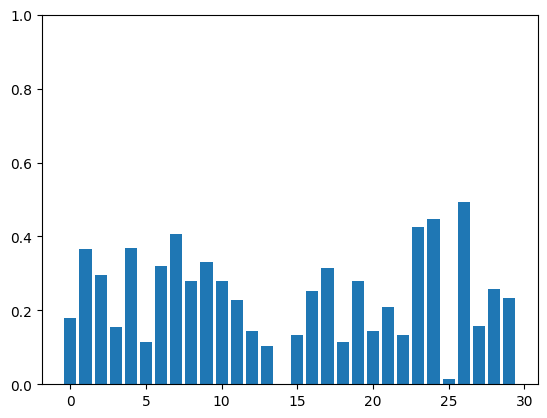

In [26]:
insatisf_P = []

for dia in range(len(dems)):
    insatisf_P.append(costos[0][dia]/sum(dems[dia].values()))

plt.bar(range(len(insatisf_P)), insatisf_P)
plt.ylim(0,1)

In [12]:
# costo_SO, costo_rutas = costos[0] ,costos[1]
# plt.plot(costo_SO, label = 'Costo SO')
# plt.plot(costo_rutas, label = 'Costo ruta')
# plt.legend()

Instancias y análisis

In [13]:
# G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'IRP1.xlsx' ,plot=False)
# G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30empty.xlsx' ,plot=False)
# historia = simular_demanda_previa(G, dist = 'n', T=1000) 

In [14]:
# for f in [2,5,10]:
#     for k in range(10):
#         rutas, perdidas, inventarios = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 60, F = f, cap = 871)
#         plt.scatter(f, np.mean(perdidas), label = f'F = {f}', color='blue')
# # plt.legend()
# plt.xlabel('F')
# plt.ylabel('Demanda perdida promedio')
# plt.ylim(0,400)
# plt.show()

In [15]:
# mis_rutas, perdidas, inventarios = simular_ejecucion_P_LS(grafo_inicial = G, T = 365, dem_historico=historia, F = 10, cap = 871)

In [16]:
# mis_rutas
# mis_rutas_t = {t : str(mis_rutas[t]) for t in mis_rutas.keys()}
# # mis_rutas_t = {t : str(set(mis_rutas[t])) for t in mis_rutas.keys()}
# df_rutas = pd.DataFrame.from_dict(mis_rutas_t, orient='index', columns=['Ruta'])
# df_rutas.value_counts()

In [17]:
# def generar_df(rutas, N):

#     rutas_bool = dict()
#     for ruta, nodos in rutas.items():
#         bools = dict()
#         for i in range(1, N+1):
#             if f'N_{i}' in nodos:
#                 bools[f'N_{i}'] = 1
#             else:
#                 bools[f'N_{i}'] = 0
#         rutas_bool[ruta] = bools
    
#     df = pd.DataFrame.from_dict(rutas_bool, orient='index')
    
#     df.rename(columns={'index': 'Ruta', 0: 'Nodo'}, inplace=True)
#     df.rename_axis('Ruta', inplace=True)
#     return df

# N = len(G.nodes())-1
# df = generar_df(mis_rutas, N)
# df['sum'] = df.sum(axis=1)

In [18]:
# df_nodos = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
# df_nodos = df_nodos.iloc[1:]
# df_nodos['frec'] = (df.describe()).T['mean']
# dem_historico_media = {nodo: np.mean(historia[nodo]) for nodo in historia.keys()}
# df_nodos['dem_mean'] = dem_historico_media.values()
# df_nodos

In [19]:
# plt.figure(figsize=(21, 7))
# plt.plot(df['sum'], '-', color='black')
# plt.xlabel('Días')
# plt.ylabel('Locales visitados')
# plt.title('Locales visitados por día')
# plt.show()

In [20]:
# plotear_tablero_visitas(df, guardar = True, nombre = 'plots//tablero_PRO_n30_orig.png')

In [21]:
# cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
# cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

# print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
# print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [22]:
# datos = dispersion_intervalos(df)
        

# df_nodos['mean'] = datos['mean']
# df_nodos['std'] = datos['std']
# df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
# df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
# df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
# df_nodos

In [23]:
# df_nodos_corr.corr()